In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense
import numpy as np
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,LSTM, Bidirectional
import pandas as pd
import matplotlib.pyplot as plt


try:
    dataset = pd.read_excel('COVID-19-DATA.xlsx',sheet_name='Full DATA')
    column_headers = dataset.iloc[0]
    dataset.columns = column_headers
    dataset = dataset.drop([0])
    dataset['Date']=pd.to_datetime(dataset['Date'])
    dataset = dataset.iloc[:, 0:7]
    dataset.fillna(0, inplace=True)
except FileNotFoundError:
    print("Dataset file not found. Please make sure 'COVID-19 DATA.xlsx' exists.")

In [46]:
dataset.columns = dataset.columns.str.strip()

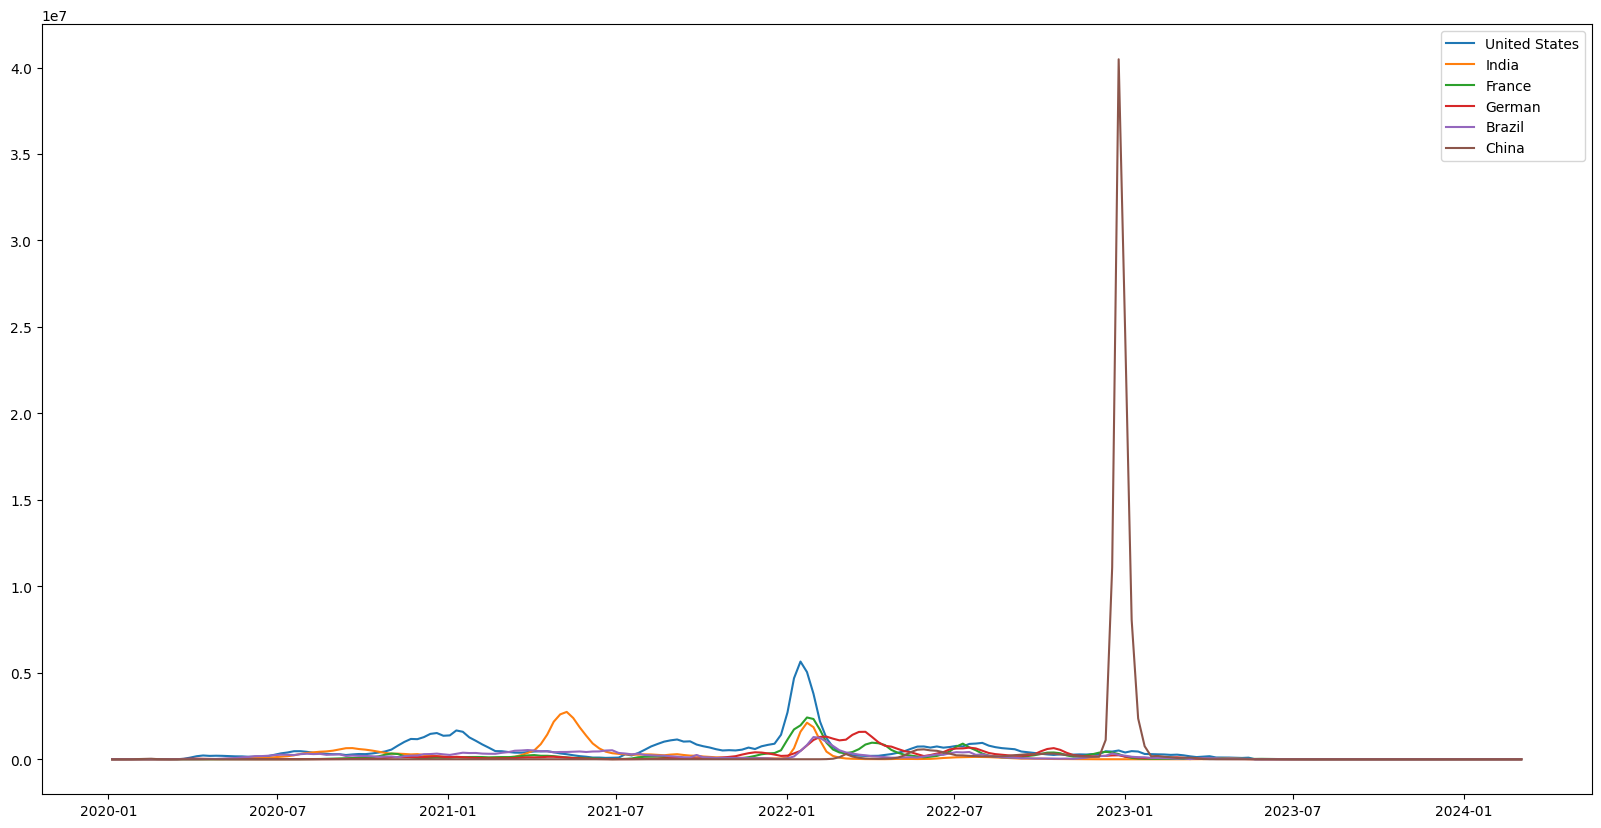

In [47]:
countries = ['United States', 'India', 'France','German','Brazil','China']
dataset = dataset[['Date'] + countries]
# Visualize the data for each country
plt.figure(figsize=(20, 10))
for country in countries:
    plt.plot(dataset['Date'], dataset[country], label=country)
plt.legend()
plt.show()

In [48]:
dataset.head()

,Date,United States,India,France,German,Brazil,China
1,2020-01-05,0,0,0,1,0,1
2,2020-01-12,0,0,0,0,0,44
3,2020-01-19,0,0,0,0,0,80
4,2020-01-26,7,0,3,1,0,1860
5,2020-02-02,2,2,3,9,0,12426


In [49]:
for country in countries:
    country_data = pd.DataFrame(list(dataset[country]), index=dataset['Date'], columns=[country])

Epoch 1/20
9/9 [==============================] - 6s 162ms/step - loss: 0.4423 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 2/20
9/9 [==============================] - 1s 82ms/step - loss: 0.1040 - accuracy: 0.0000e+00 - val_loss: 0.0663 - val_accuracy: 0.0000e+00
Epoch 3/20
9/9 [==============================] - 1s 81ms/step - loss: 0.0933 - accuracy: 0.0000e+00 - val_loss: 0.0655 - val_accuracy: 0.0000e+00
Epoch 4/20
9/9 [==============================] - 1s 82ms/step - loss: 0.0914 - accuracy: 0.0000e+00 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 5/20
9/9 [==============================] - 1s 82ms/step - loss: 0.0896 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0000e+00
Epoch 6/20
9/9 [==============================] - 1s 83ms/step - loss: 0.0861 - accuracy: 0.0000e+00 - val_loss: 0.0527 - val_accuracy: 0.0000e+00
Epoch 7/20
9/9 [==============================] - 1s 82ms/step - loss: 0.0869 - accuracy: 0.0000e+00 - val_loss: 0.03

Epoch 16/20
9/9 [==============================] - 1s 74ms/step - loss: 0.0801 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 17/20
9/9 [==============================] - 1s 81ms/step - loss: 0.0621 - accuracy: 0.0000e+00 - val_loss: 0.0240 - val_accuracy: 0.0000e+00
Epoch 18/20
9/9 [==============================] - 1s 132ms/step - loss: 0.0657 - accuracy: 0.0000e+00 - val_loss: 9.8440e-04 - val_accuracy: 0.0000e+00
Epoch 19/20
9/9 [==============================] - 1s 76ms/step - loss: 0.0498 - accuracy: 0.0000e+00 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 20/20
2/2 [==============================] - 1s 14ms/step
Epoch 1/20
9/9 [==============================] - 7s 155ms/step - loss: 0.4097 - accuracy: 0.0000e+00 - val_loss: 0.0817 - val_accuracy: 0.0000e+00
Epoch 2/20
9/9 [==============================] - 1s 76ms/step - loss: 0.1766 - accuracy: 0.0000e+00 - val_loss: 0.0662 - val_accuracy: 0.0000e+00
Epoch 3/20
9/9 [============================

9/9 [==============================] - 1s 78ms/step - loss: 0.0430 - accuracy: 0.0000e+00 - val_loss: 4.6347e-04 - val_accuracy: 0.0000e+00
Epoch 11/20
9/9 [==============================] - 1s 77ms/step - loss: 0.0421 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 12/20
9/9 [==============================] - 1s 80ms/step - loss: 0.0434 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 13/20
9/9 [==============================] - 1s 81ms/step - loss: 0.0427 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 14/20
9/9 [==============================] - 1s 74ms/step - loss: 0.0429 - accuracy: 0.0000e+00 - val_loss: 4.1800e-04 - val_accuracy: 0.0000e+00
Epoch 15/20
9/9 [==============================] - 1s 100ms/step - loss: 0.0435 - accuracy: 0.0000e+00 - val_loss: 5.3900e-04 - val_accuracy: 0.0000e+00
Epoch 16/20
9/9 [==============================] - 1s 97ms/step - loss: 0.0425 - accuracy: 0.0000e+00 - val_los

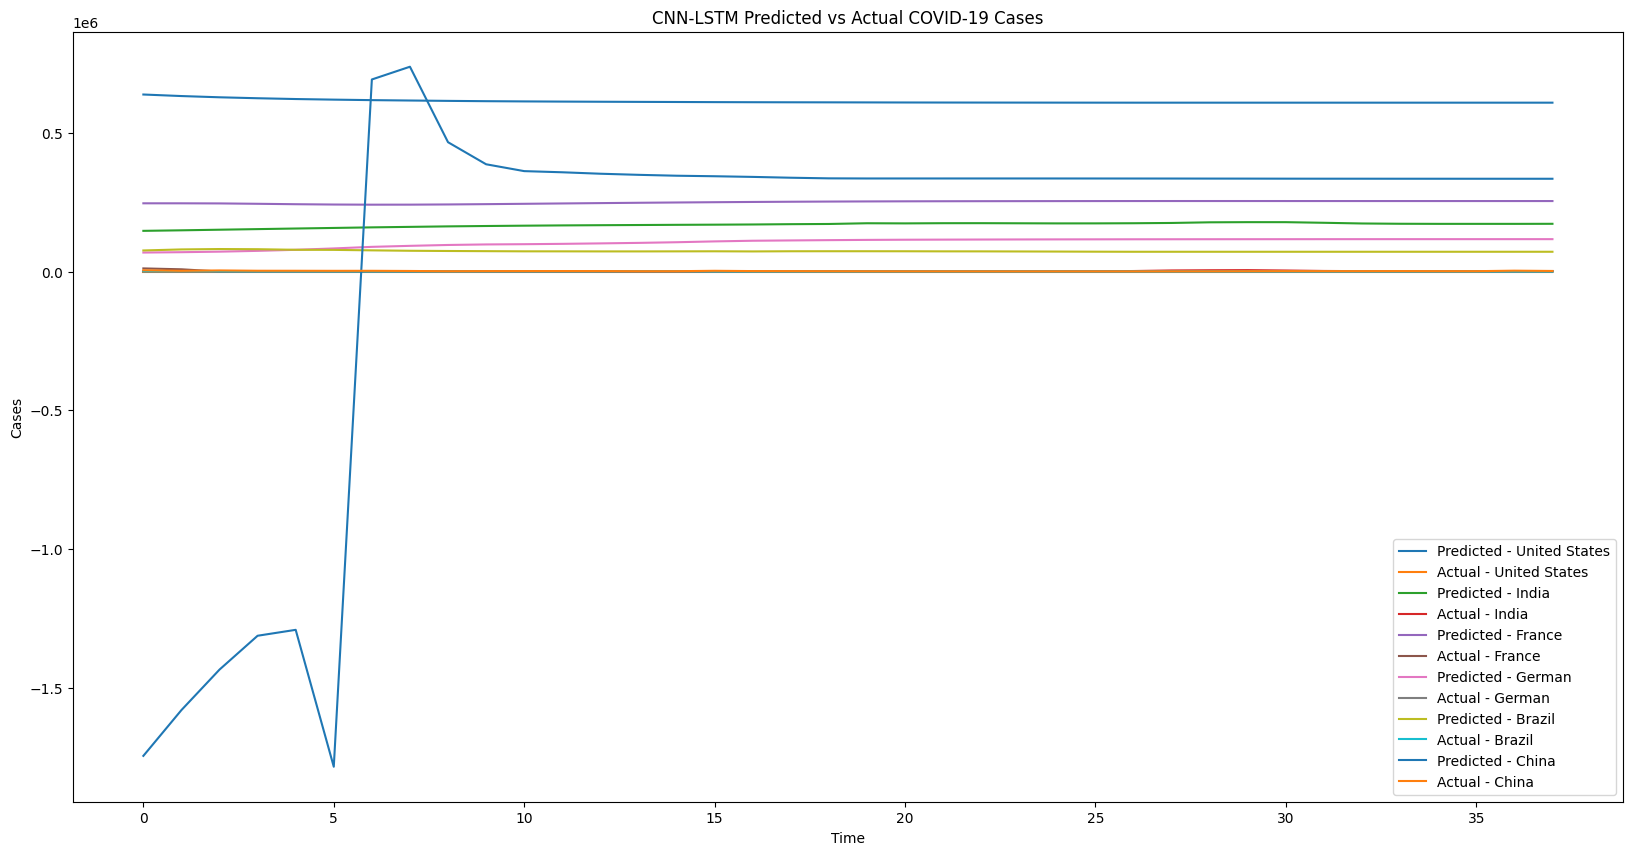

In [51]:
# Define the model architecture
def build_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(Bidirectional(LSTM(64, activation='relu')))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))
    return model

# Preprocess, scale, sequence, train, and predict for each country
plt.figure(figsize=(20, 10)) 

# Loop through each country
for country in ['United States','India','France','German','Brazil','China']:
    # Prepare data for the specific country
    country_data = pd.DataFrame(list(dataset[country]), index=dataset['Date'], columns=[country])
    
    # Scale the data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(country_data)
    
    # Prepare input-output sequences
    steps = 30
    inputs = []
    outputs = []
    for i in range(len(scaled_data) - steps):
        inputs.append(scaled_data[i:i + steps])
        outputs.append(scaled_data[i + steps])

    inputs = np.asarray(inputs)
    outputs = np.asarray(outputs)
    x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, shuffle=False)

    # Build and compile the model
    input_shape = (inputs.shape[1], inputs.shape[2])  # Shape of input sequence
    model = build_model(input_shape)
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

    # Make predictions
    predicted = model.predict(x_test)
    predicted = scaler.inverse_transform(predicted)
    y_test = scaler.inverse_transform(y_test)

    # Plot predicted vs. actual values for the current country
    plt.plot(predicted, label=f'Predicted - {country}')
    plt.plot(y_test, label=f'Actual - {country}')

# Set plot labels and legend
plt.xlabel('Time')
plt.ylabel('Cases')
plt.title('CNN-LSTM Predicted vs Actual COVID-19 Cases')
plt.legend()
plt.show()